In [1]:
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.channels import make_standard_montage

# 1. File Loading and Preparation
# ----------------------------------------------------------------
# Load CSV data
data = pd.read_csv('20250707172917_Ankit neuro_S Female EEG MAIN STUDY.csv')  # Replace with your filename
sfreq = 500  # Sampling rate (Hz)

# Extract EEG data and convert to volts (nV → V)
eeg_data = data.iloc[:, :32].values.T * 1e-9  # (32 channels x samples)
ch_names = data.columns[:32].tolist()

# Extract events from Marker_Flag column
events = []
for i in range(len(data)):
    marker = data['Marker_Flag'].iloc[i]
    if marker > 0:  # Only consider non-zero markers
        events.append([i, 0, marker])
events = np.array(events)

# Create MNE info structure
montage = make_standard_montage('standard_1020')
info = mne.create_info(
    ch_names=ch_names,
    sfreq=sfreq,
    ch_types='eeg'
)
info.set_montage(montage)

# Create Raw object
raw = mne.io.RawArray(eeg_data, info)

Creating RawArray with float64 data, n_channels=32, n_times=759050
    Range : 0 ... 759049 =      0.000 ...  1518.098 secs
Ready.


Using matplotlib as 2D backend.


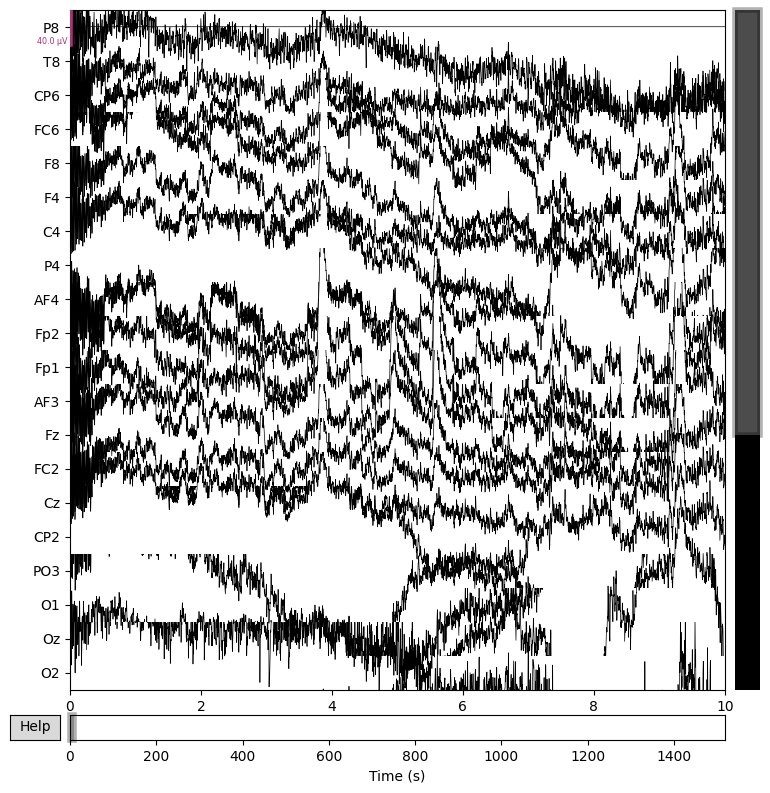

In [2]:
raw.plot();

In [3]:

# # 3. Filtering
# raw_notch = raw.copy().notch_filter(freqs=50)
# raw_erp = raw_notch.copy().filter(0.5, 30)
# raw_psd = raw_notch.copy().filter(1, 45)

# # 4. Downsampling (optional)
# raw_erp.resample(250)
# raw_psd.resample(250)

# # 5. Rereferencing
# raw_erp.set_eeg_reference('average', projection=False)
# raw_psd.set_eeg_reference('average', projection=False)

# # 6. Artifact Correction with ICA
# ica = mne.preprocessing.ICA(n_components=31, random_state=42, method='fastica',)
# ica.fit(raw_erp)
# # Automatically find EOG components (assuming channels labeled 'Fp1','Fp2')






# # 1) Define your threshold in Volts
# threshold_volt = 9e-6  # 10 µV

# # 2) Find the channel indices for Fp1 & Fp2
# ch_names = raw_erp.ch_names
# fp_picks = [ch_names.index(ch) for ch in ('Fp1', 'Fp2')]

# # 3) Extract the ICA mixing matrix (n_channels × n_components)
# mixing = ica.mixing_matrix_

# # 4) Find all components whose absolute weight at Fp1 or Fp2 exceeds threshold
# bad_comps = [
#     comp
#     for comp in range(mixing.shape[1])
#     if any(abs(mixing[pick, comp]) > threshold_volt for pick in fp_picks)
# ]

# print(f"Marking ICA components {bad_comps} as EOG‐noisy (|map| > 10 µV at Fp1/Fp2).")

# # 5) Tell MNE to exclude them
# ica.exclude = bad_comps

# # 6) (Optional) plot the topos of your “bad” components for sanity check
# # ica.plot_components(bad_comps, picks=bad_comps)
# ica.plot_components(bad_comps)

# # 7) Finally apply the ICA to remove them





# raw_erp_clean = ica.apply(raw_erp.copy())
# # raw_psd_clean = ica.apply(raw_erp.copy())

In [4]:

# 3. Filtering
raw_notch = raw.copy().notch_filter(freqs=50)
raw_erp = raw_notch.copy().filter(0.5, 30)
raw_psd = raw_notch.copy().filter(1, 45)

# 4. Downsampling (optional)
raw_erp.resample(250)
raw_psd.resample(250)

# 5. Rereferencing
raw_erp.set_eeg_reference('average', projection=False)
raw_psd.set_eeg_reference('average', projection=False)

# 6. Artifact Correction with ICA
ica = mne.preprocessing.ICA(n_components=31, random_state=42, method='fastica')
ica.fit(raw_erp)
# Automatically find EOG components (assuming channels labeled 'Fp1','Fp2')
eog_inds, scores = ica.find_bads_eog(raw_erp, ch_name=['Fp1', 'Fp2'])
ica.exclude = eog_inds
raw_erp_clean = ica.apply(raw_erp.copy())
raw_psd_clean = ica.apply(raw_erp.copy())

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.4s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 31 components
Fitting ICA took 7.9s.
Using EOG channels: Fp1, Fp2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (31 components)
    Zeroing out 2 ICA components
    Projecting back using 32 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (31 components)
    Zeroing out 2 ICA components
    Projecting back using 32 PCA components


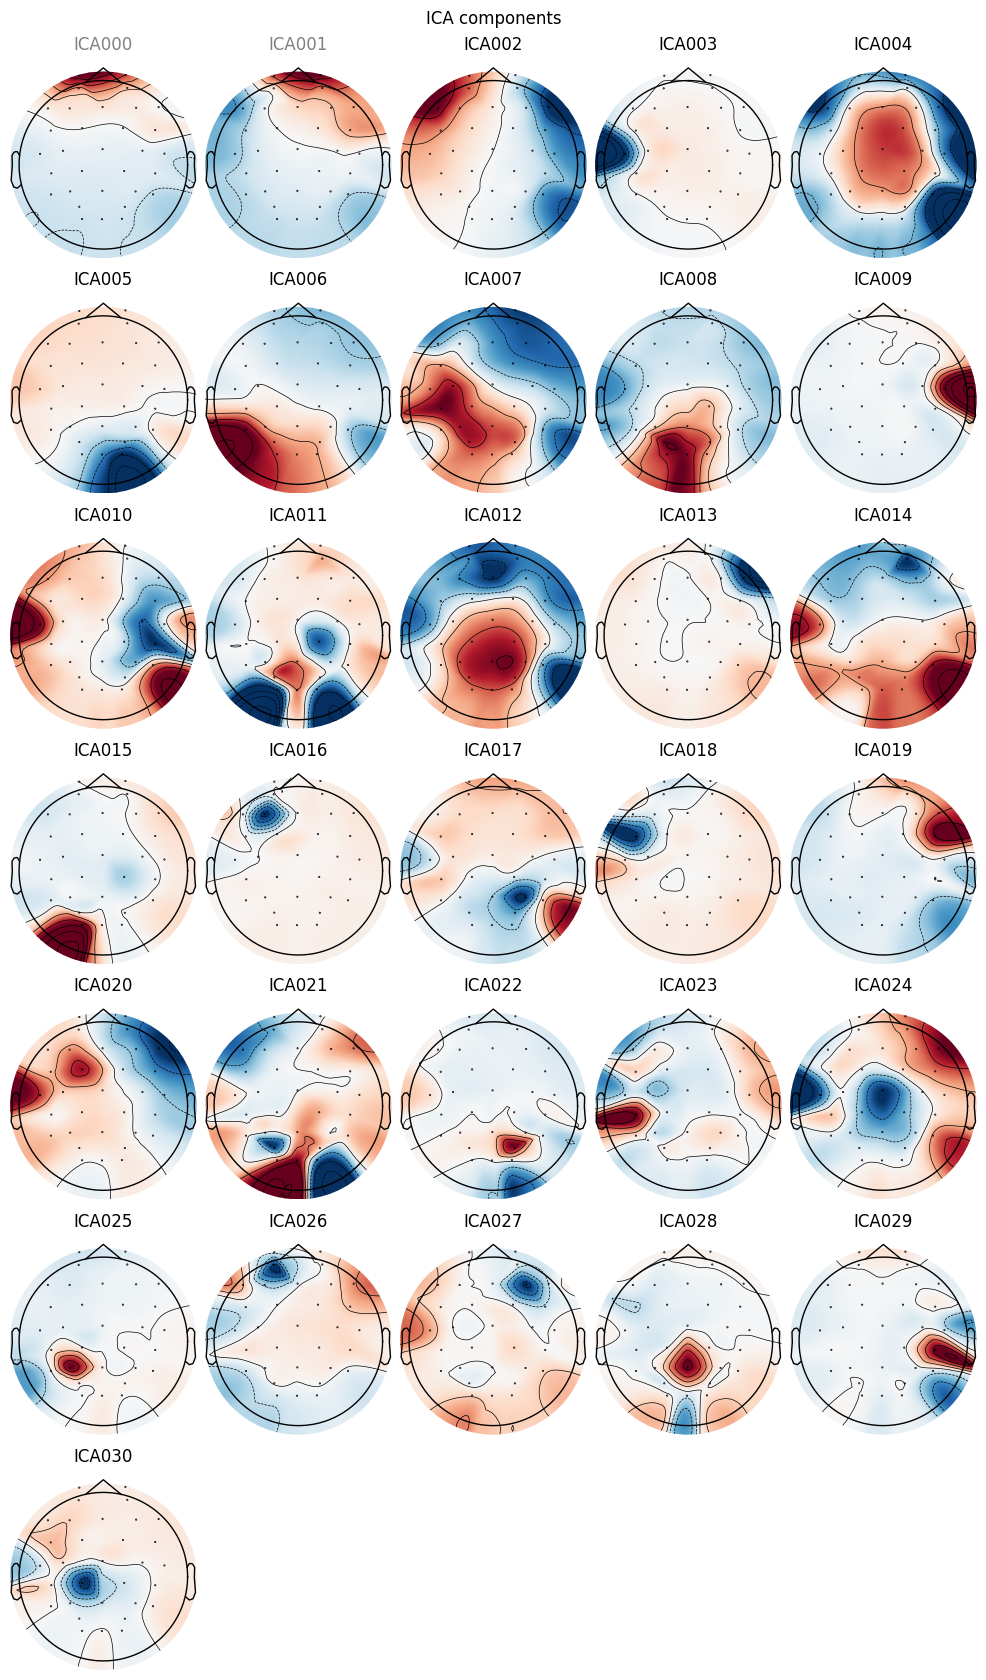

Creating RawArray with float64 data, n_channels=31, n_times=379525
    Range : 0 ... 379524 =      0.000 ...  1518.096 secs
Ready.


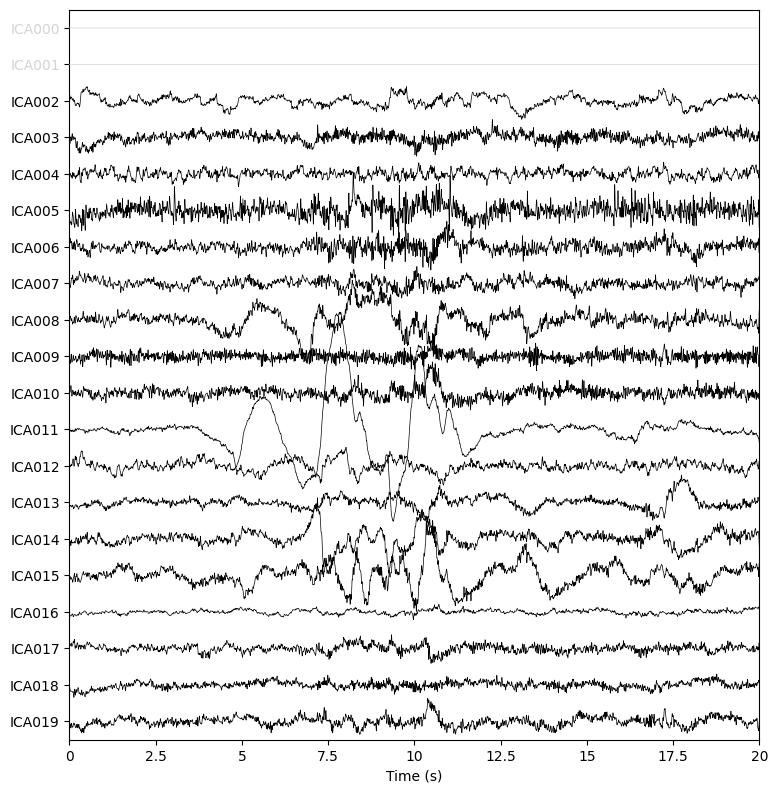

In [5]:
ica.plot_components(picks=range(ica.n_components_))
ica.plot_sources(raw_erp_clean, show_scrollbars=False);

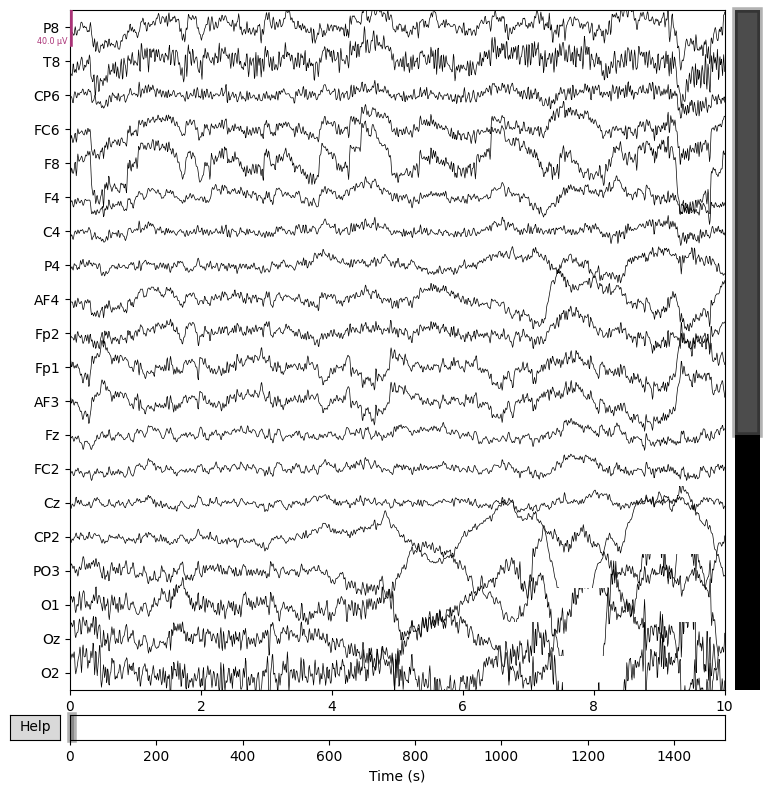

In [6]:
raw_erp_clean.plot();

# p300

Not setting metadata
100 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 501 original time points ...
47 bad epochs dropped
Surviving epochs: 53


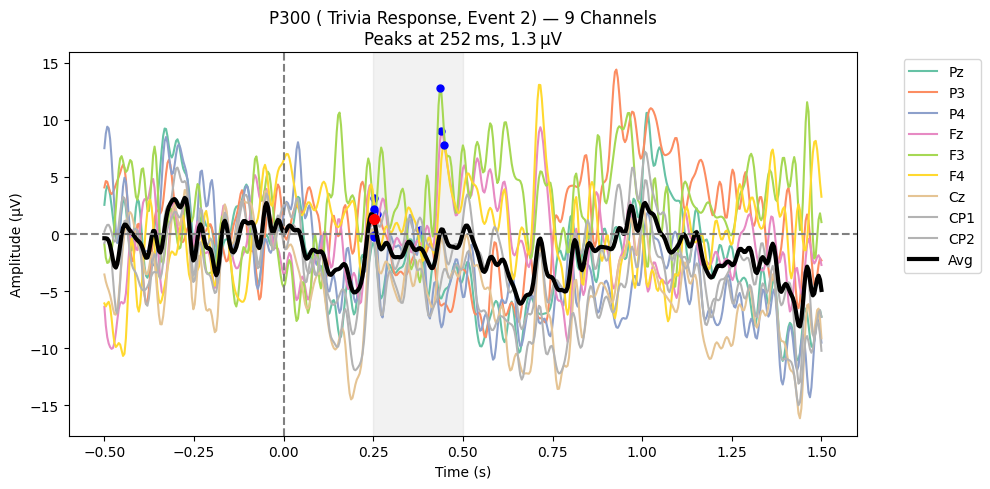

===  Trivia Response (Event 2) P300 positive peaks ===
   Pz:  380.0 ms,   0.3 µV
   P3:  260.0 ms,   1.8 µV
   P4:  252.0 ms,   3.2 µV
   Fz:  440.0 ms,   9.0 µV
   F3:  436.0 ms,  12.8 µV
   F4:  448.0 ms,   7.8 µV
   Cz:  252.0 ms,  -0.1 µV
  CP1:  252.0 ms,   2.2 µV
  CP2:  252.0 ms,  -0.3 µV
AVG:  252.0 ms,   1.3 µV



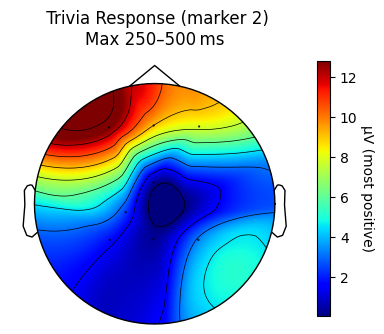

In [7]:

#3 - 4 for all electrodes

p300_epochs = mne.Epochs(
    raw_erp_clean,
    events,
    event_id=[2, 4, 5, 6, 7],
    tmin=-0.5,
    tmax=1.5,
    baseline=(-0.2, 0),
    preload=True,
    picks= ['Pz','P3','P4','Fz', 'F3', 'F4', 'Cz', 'CP1', 'CP2']

)
p300_epochs.drop_bad()
print("Surviving epochs:", len(p300_epochs))

import matplotlib.pyplot as plt
import numpy as np
import mne

# --- 1. Define your event bins and channel sets ---
event_bins = {
    2: ' Trivia Response',
    4: 'Safe',
    5: ' Win',
    6: ' Loss',
    7: 'Reveal'
}
chs9 = ['Pz','P3','P4','Fz', 'F3', 'F4', 'Cz', 'CP1', 'CP2']

# --- 2. Pick your marker manually here ---
selected_event = 2  # ← change this to 4, 5, 6, or 7
name = event_bins[selected_event]

# --- 3. Positive peak time window (in seconds) ---
tmin, tmax = 0.25, 0.5

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs9)))

# --- 5. Select that event’s epochs and compute Evoked ---
epochs_sel = p300_epochs[selected_event].copy().pick(chs9)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # convert to µV

# --- 6. Find per‑channel positive peaks in your window ---
mask      = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs9):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmax(win_wv)              # positive peak index
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average positive peak ---
grand      = data.mean(axis=0)
grand_win  = grand[mask]
g_idx      = np.argmax(grand_win)
g_t        = win_times[g_idx]
g_a        = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'P300 ({name}, Event {selected_event}) — 9 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the positive peaks ---
print(f"=== {name} (Event {selected_event}) P300 positive peaks ===")
for ch in chs9:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

# --- 10. Topomap of positive peaks ---
# Crop evoked to the window
tmin_avg, tmax_avg = 0.25, 0.5
ev      = p300_epochs[selected_event].copy().pick(chs9).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data             # shape (n_channels, n_times)
data_peak = data_win.max(axis=1)   # positive peaks per channel

# convert to µV (already µV from data above)
data_peak_uv = data_peak *1e6

vmin_uv = data_peak_uv.min()
vmax_uv = data_peak_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_peak_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Max {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most positive)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


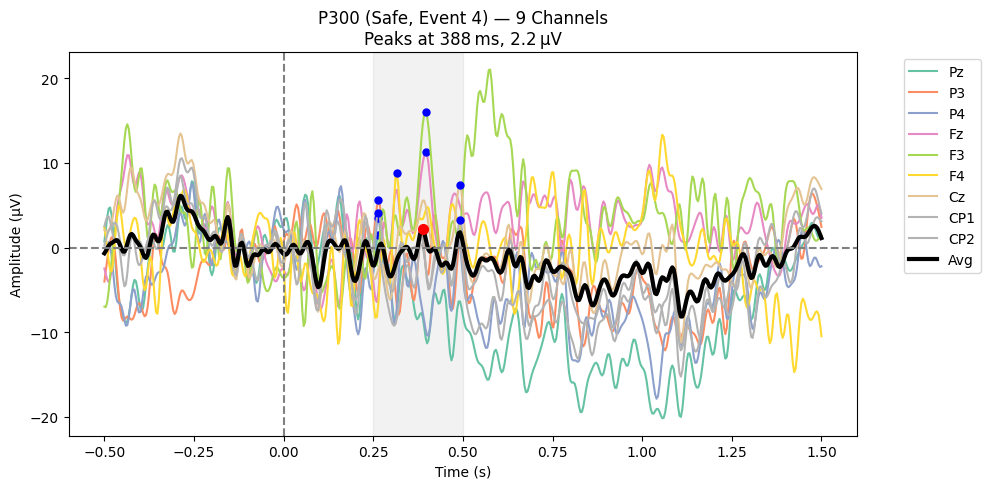

=== Safe (Event 4) P300 positive peaks ===
   Pz:  264.0 ms,   1.5 µV
   P3:  264.0 ms,   5.6 µV
   P4:  264.0 ms,   3.4 µV
   Fz:  396.0 ms,  11.3 µV
   F3:  396.0 ms,  16.0 µV
   F4:  316.0 ms,   8.8 µV
   Cz:  492.0 ms,   7.4 µV
  CP1:  492.0 ms,   3.3 µV
  CP2:  264.0 ms,   4.1 µV
AVG:  388.0 ms,   2.2 µV



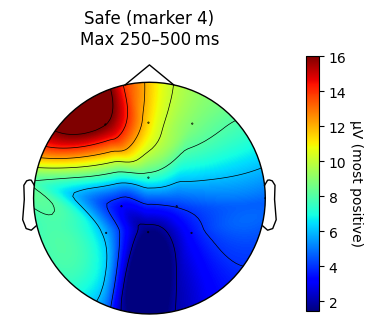

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import mne

# --- 1. Define your event bins and channel sets ---
event_bins = {
    2: ' Trivia Response',
    4: 'Safe',
    5: ' Win',
    6: ' Loss',
    7: 'Reveal'
}
chs9 = ['Pz','P3','P4','Fz', 'F3', 'F4', 'Cz', 'CP1', 'CP2']

# --- 2. Pick your marker manually here ---
selected_event = 4  # ← change this to 4, 5, 6, or 7
name = event_bins[selected_event]

# --- 3. Positive peak time window (in seconds) ---
tmin, tmax = 0.25, 0.5

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs9)))

# --- 5. Select that event’s epochs and compute Evoked ---
epochs_sel = p300_epochs[selected_event].copy().pick(chs9)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # convert to µV

# --- 6. Find per‑channel positive peaks in your window ---
mask      = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs9):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmax(win_wv)              # positive peak index
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average positive peak ---
grand      = data.mean(axis=0)
grand_win  = grand[mask]
g_idx      = np.argmax(grand_win)
g_t        = win_times[g_idx]
g_a        = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'P300 ({name}, Event {selected_event}) — 9 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the positive peaks ---
print(f"=== {name} (Event {selected_event}) P300 positive peaks ===")
for ch in chs9:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

# --- 10. Topomap of positive peaks ---
# Crop evoked to the window
tmin_avg, tmax_avg = 0.25, 0.5
ev      = p300_epochs[selected_event].copy().pick(chs9).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data             # shape (n_channels, n_times)
data_peak = data_win.max(axis=1)   # positive peaks per channel

# convert to µV (already µV from data above)
data_peak_uv = data_peak *1e6

vmin_uv = data_peak_uv.min()
vmax_uv = data_peak_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_peak_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Max {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most positive)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


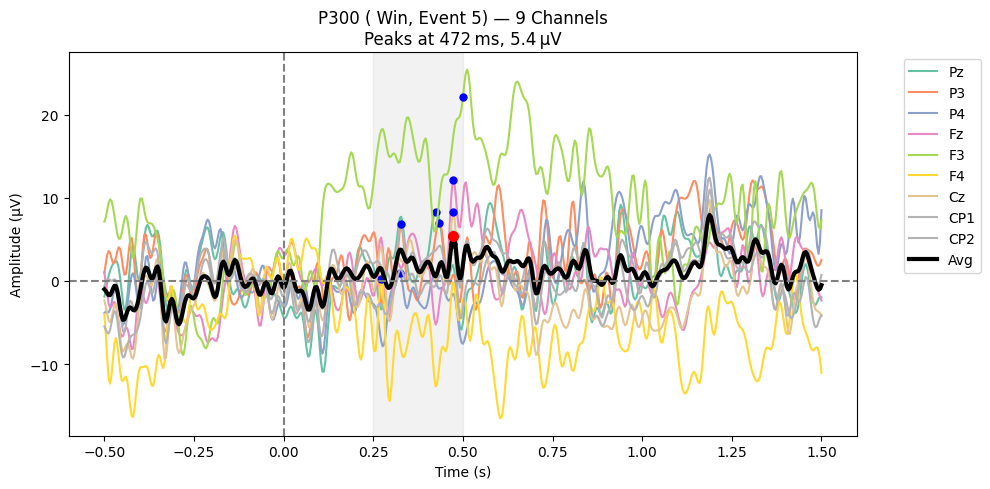

===  Win (Event 5) P300 positive peaks ===
   Pz:  424.0 ms,   8.3 µV
   P3:  432.0 ms,   7.0 µV
   P4:  324.0 ms,   0.9 µV
   Fz:  472.0 ms,  12.1 µV
   F3:  500.0 ms,  22.1 µV
   F4:  272.0 ms,   0.2 µV
   Cz:  472.0 ms,   8.3 µV
  CP1:  328.0 ms,   6.8 µV
  CP2:  472.0 ms,   4.5 µV
AVG:  472.0 ms,   5.4 µV



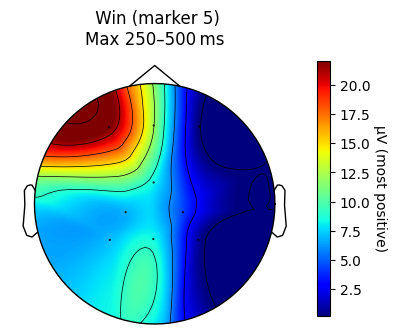

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import mne

# --- 1. Define your event bins and channel sets ---
event_bins = {
    2: ' Trivia Response',
    4: 'Safe',
    5: ' Win',
    6: ' Loss',
    7: 'Reveal'
}
chs9 = ['Pz','P3','P4','Fz', 'F3', 'F4', 'Cz', 'CP1', 'CP2']

# --- 2. Pick your marker manually here ---
selected_event = 5  # ← change this to 4, 5, 6, or 7
name = event_bins[selected_event]

# --- 3. Positive peak time window (in seconds) ---
tmin, tmax = 0.25, 0.5

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs9)))

# --- 5. Select that event’s epochs and compute Evoked ---
epochs_sel = p300_epochs[selected_event].copy().pick(chs9)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # convert to µV

# --- 6. Find per‑channel positive peaks in your window ---
mask      = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs9):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmax(win_wv)              # positive peak index
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average positive peak ---
grand      = data.mean(axis=0)
grand_win  = grand[mask]
g_idx      = np.argmax(grand_win)
g_t        = win_times[g_idx]
g_a        = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'P300 ({name}, Event {selected_event}) — 9 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the positive peaks ---
print(f"=== {name} (Event {selected_event}) P300 positive peaks ===")
for ch in chs9:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

# --- 10. Topomap of positive peaks ---
# Crop evoked to the window
tmin_avg, tmax_avg = 0.25, 0.5
ev      = p300_epochs[selected_event].copy().pick(chs9).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data             # shape (n_channels, n_times)
data_peak = data_win.max(axis=1)   # positive peaks per channel

# convert to µV (already µV from data above)
data_peak_uv = data_peak *1e6

vmin_uv = data_peak_uv.min()
vmax_uv = data_peak_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_peak_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Max {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most positive)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


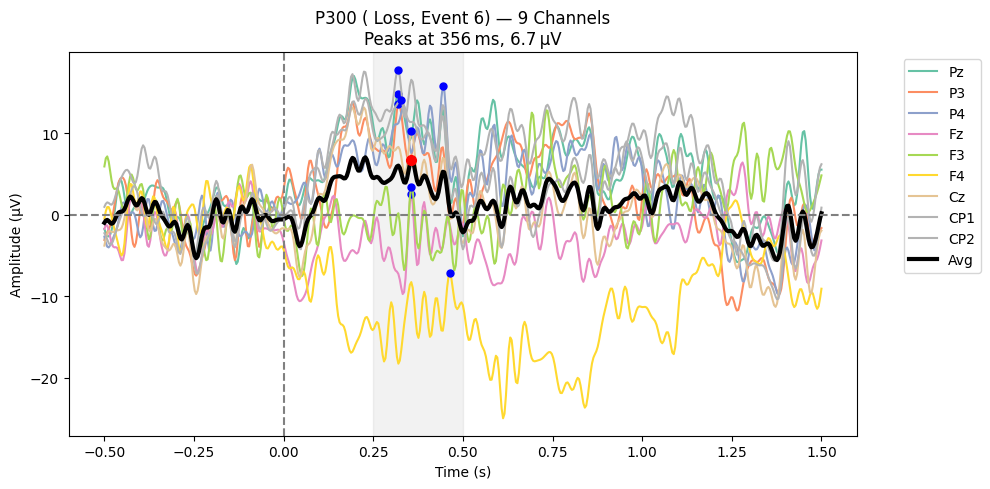

===  Loss (Event 6) P300 positive peaks ===
   Pz:  320.0 ms,  14.8 µV
   P3:  320.0 ms,  13.6 µV
   P4:  444.0 ms,  15.8 µV
   Fz:  356.0 ms,   2.6 µV
   F3:  356.0 ms,   3.5 µV
   F4:  464.0 ms,  -7.2 µV
   Cz:  356.0 ms,  10.3 µV
  CP1:  320.0 ms,  17.8 µV
  CP2:  328.0 ms,  14.1 µV
AVG:  356.0 ms,   6.7 µV



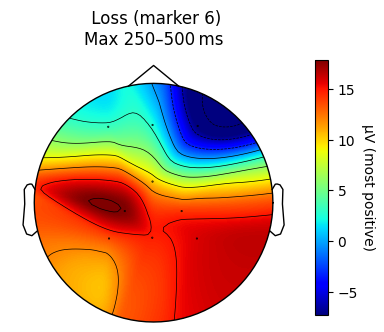

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import mne

# --- 1. Define your event bins and channel sets ---
event_bins = {
    2: ' Trivia Response',
    4: 'Safe',
    5: ' Win',
    6: ' Loss',
    7: 'Reveal'
}
chs9 = ['Pz','P3','P4','Fz', 'F3', 'F4', 'Cz', 'CP1', 'CP2']

# --- 2. Pick your marker manually here ---
selected_event = 6  # ← change this to 4, 5, 6, or 7
name = event_bins[selected_event]

# --- 3. Positive peak time window (in seconds) ---
tmin, tmax = 0.25, 0.5

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs9)))

# --- 5. Select that event’s epochs and compute Evoked ---
epochs_sel = p300_epochs[selected_event].copy().pick(chs9)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # convert to µV

# --- 6. Find per‑channel positive peaks in your window ---
mask      = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs9):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmax(win_wv)              # positive peak index
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average positive peak ---
grand      = data.mean(axis=0)
grand_win  = grand[mask]
g_idx      = np.argmax(grand_win)
g_t        = win_times[g_idx]
g_a        = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'P300 ({name}, Event {selected_event}) — 9 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the positive peaks ---
print(f"=== {name} (Event {selected_event}) P300 positive peaks ===")
for ch in chs9:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

# --- 10. Topomap of positive peaks ---
# Crop evoked to the window
tmin_avg, tmax_avg = 0.25, 0.5
ev      = p300_epochs[selected_event].copy().pick(chs9).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data             # shape (n_channels, n_times)
data_peak = data_win.max(axis=1)   # positive peaks per channel

# convert to µV (already µV from data above)
data_peak_uv = data_peak *1e6

vmin_uv = data_peak_uv.min()
vmax_uv = data_peak_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_peak_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Max {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most positive)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


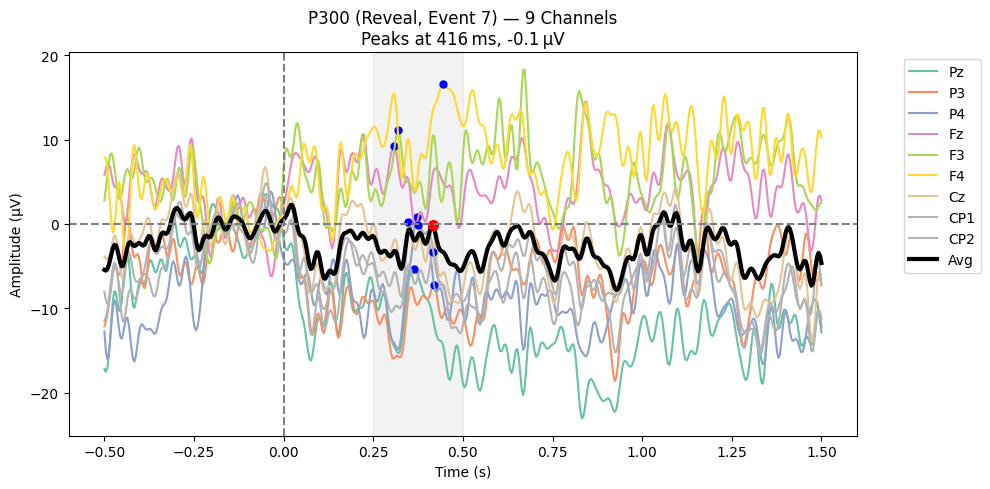

=== Reveal (Event 7) P300 positive peaks ===
   Pz:  364.0 ms,  -5.3 µV
   P3:  420.0 ms,  -7.2 µV
   P4:  372.0 ms,   0.9 µV
   Fz:  308.0 ms,   9.2 µV
   F3:  320.0 ms,  11.1 µV
   F4:  444.0 ms,  16.6 µV
   Cz:  348.0 ms,   0.3 µV
  CP1:  416.0 ms,  -3.4 µV
  CP2:  376.0 ms,  -0.1 µV
AVG:  416.0 ms,  -0.1 µV



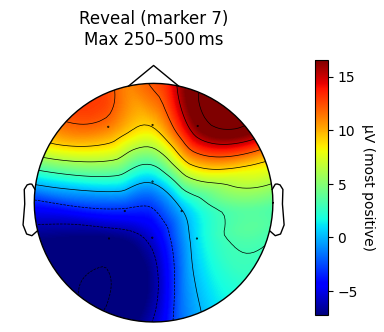

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import mne

# --- 1. Define your event bins and channel sets ---
event_bins = {
    2: ' Trivia Response',
    4: 'Safe',
    5: ' Win',
    6: ' Loss',
    7: 'Reveal'
}
chs9 = ['Pz','P3','P4','Fz', 'F3', 'F4', 'Cz', 'CP1', 'CP2']

# --- 2. Pick your marker manually here ---
selected_event = 7  # ← change this to 4, 5, 6, or 7
name = event_bins[selected_event]

# --- 3. Positive peak time window (in seconds) ---
tmin, tmax = 0.25, 0.5

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs9)))

# --- 5. Select that event’s epochs and compute Evoked ---
epochs_sel = p300_epochs[selected_event].copy().pick(chs9)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # convert to µV

# --- 6. Find per‑channel positive peaks in your window ---
mask      = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs9):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmax(win_wv)              # positive peak index
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average positive peak ---
grand      = data.mean(axis=0)
grand_win  = grand[mask]
g_idx      = np.argmax(grand_win)
g_t        = win_times[g_idx]
g_a        = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'P300 ({name}, Event {selected_event}) — 9 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the positive peaks ---
print(f"=== {name} (Event {selected_event}) P300 positive peaks ===")
for ch in chs9:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

# --- 10. Topomap of positive peaks ---
# Crop evoked to the window
tmin_avg, tmax_avg = 0.25, 0.5
ev      = p300_epochs[selected_event].copy().pick(chs9).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data             # shape (n_channels, n_times)
data_peak = data_win.max(axis=1)   # positive peaks per channel

# convert to µV (already µV from data above)
data_peak_uv = data_peak *1e6

vmin_uv = data_peak_uv.min()
vmax_uv = data_peak_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_peak_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Max {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most positive)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


# for 5 electrodes

Not setting metadata
100 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 501 original time points ...
47 bad epochs dropped
Surviving epochs: 53


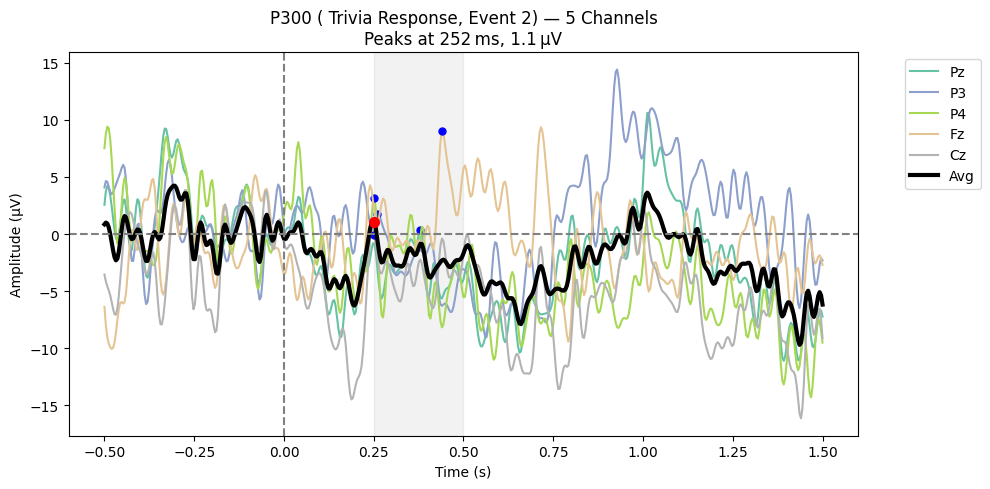

===  Trivia Response (Event 2) P300 positive peaks ===
   Pz:  380.0 ms,   0.3 µV
   P3:  260.0 ms,   1.8 µV
   P4:  252.0 ms,   3.2 µV
   Fz:  440.0 ms,   9.0 µV
   Cz:  252.0 ms,  -0.1 µV
AVG:  252.0 ms,   1.1 µV



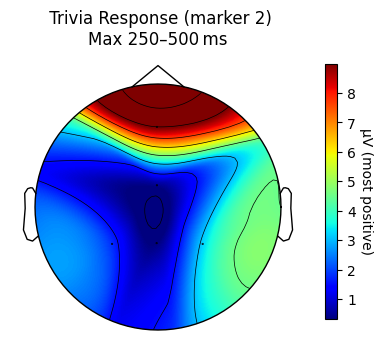

In [12]:

#3 - 4 for all electrodes

p300_epochs = mne.Epochs(
    raw_erp_clean,
    events,
    event_id=[2, 4, 5, 6, 7],
    tmin=-0.5,
    tmax=1.5,
    baseline=(-0.2, 0),
    preload=True,
    picks= ['Pz','P3','P4','Fz', 'Cz']

)
p300_epochs.drop_bad()
print("Surviving epochs:", len(p300_epochs))

import matplotlib.pyplot as plt
import numpy as np
import mne

# --- 1. Define your event bins and channel sets ---
event_bins = {
    2: ' Trivia Response',
    4: 'Safe',
    5: ' Win',
    6: ' Loss',
    7: 'Reveal'
}
chs5 = ['Pz','P3','P4','Fz', 'Cz']

# --- 2. Pick your marker manually here ---
selected_event = 2  # ← change this to 4, 5, 6, or 7
name = event_bins[selected_event]

# --- 3. Positive peak time window (in seconds) ---
tmin, tmax = 0.25, 0.5

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs5)))

# --- 5. Select that event’s epochs and compute Evoked ---
epochs_sel = p300_epochs[selected_event].copy().pick(chs5)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # convert to µV

# --- 6. Find per‑channel positive peaks in your window ---
mask      = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs5):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmax(win_wv)              # positive peak index
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average positive peak ---
grand      = data.mean(axis=0)
grand_win  = grand[mask]
g_idx      = np.argmax(grand_win)
g_t        = win_times[g_idx]
g_a        = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'P300 ({name}, Event {selected_event}) — 5 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the positive peaks ---
print(f"=== {name} (Event {selected_event}) P300 positive peaks ===")
for ch in chs5:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

# --- 10. Topomap of positive peaks ---
# Crop evoked to the window
tmin_avg, tmax_avg = 0.25, 0.5
ev      = p300_epochs[selected_event].copy().pick(chs5).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data             # shape (n_channels, n_times)
data_peak = data_win.max(axis=1)   # positive peaks per channel

# convert to µV (already µV from data above)
data_peak_uv = data_peak *1e6

vmin_uv = data_peak_uv.min()
vmax_uv = data_peak_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_peak_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Max {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most positive)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


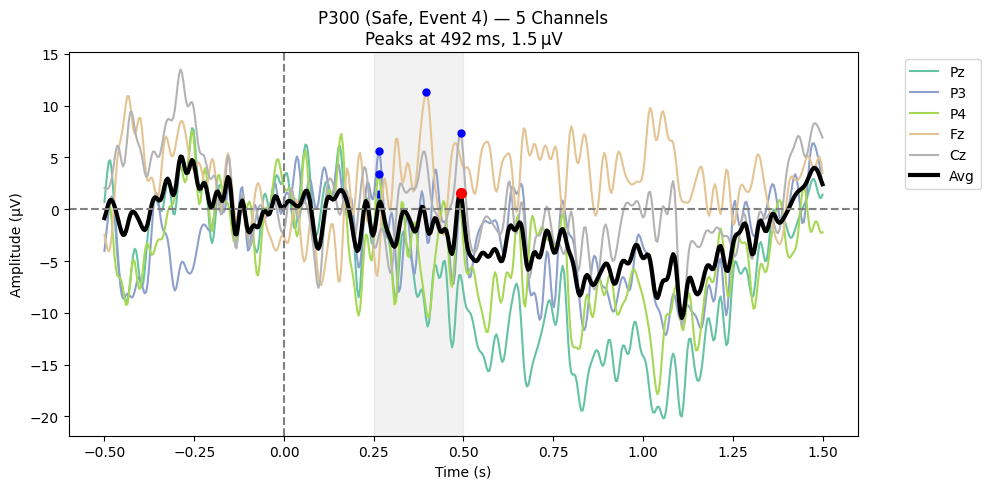

=== Safe (Event 4) P300 positive peaks ===
   Pz:  264.0 ms,   1.5 µV
   P3:  264.0 ms,   5.6 µV
   P4:  264.0 ms,   3.4 µV
   Fz:  396.0 ms,  11.3 µV
   Cz:  492.0 ms,   7.4 µV
AVG:  492.0 ms,   1.5 µV



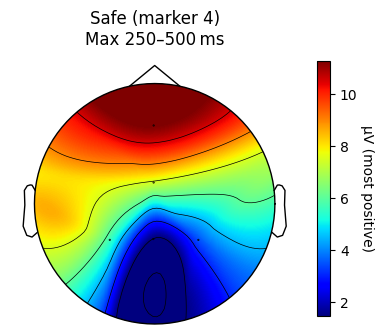

In [13]:
# --- 1. Define your event bins and channel sets ---
event_bins = {
    2: ' Trivia Response',
    4: 'Safe',
    5: ' Win',
    6: ' Loss',
    7: 'Reveal'
}
chs5 = ['Pz','P3','P4','Fz', 'Cz']

# --- 2. Pick your marker manually here ---
selected_event = 4  # ← change this to 4, 5, 6, or 7
name = event_bins[selected_event]

# --- 3. Positive peak time window (in seconds) ---
tmin, tmax = 0.25, 0.5

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs5)))

# --- 5. Select that event’s epochs and compute Evoked ---
epochs_sel = p300_epochs[selected_event].copy().pick(chs5)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # convert to µV

# --- 6. Find per‑channel positive peaks in your window ---
mask      = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs5):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmax(win_wv)              # positive peak index
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average positive peak ---
grand      = data.mean(axis=0)
grand_win  = grand[mask]
g_idx      = np.argmax(grand_win)
g_t        = win_times[g_idx]
g_a        = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'P300 ({name}, Event {selected_event}) — 5 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the positive peaks ---
print(f"=== {name} (Event {selected_event}) P300 positive peaks ===")
for ch in chs5:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

# --- 10. Topomap of positive peaks ---
# Crop evoked to the window
tmin_avg, tmax_avg = 0.25, 0.5
ev      = p300_epochs[selected_event].copy().pick(chs5).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data             # shape (n_channels, n_times)
data_peak = data_win.max(axis=1)   # positive peaks per channel

# convert to µV (already µV from data above)
data_peak_uv = data_peak *1e6

vmin_uv = data_peak_uv.min()
vmax_uv = data_peak_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_peak_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Max {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most positive)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


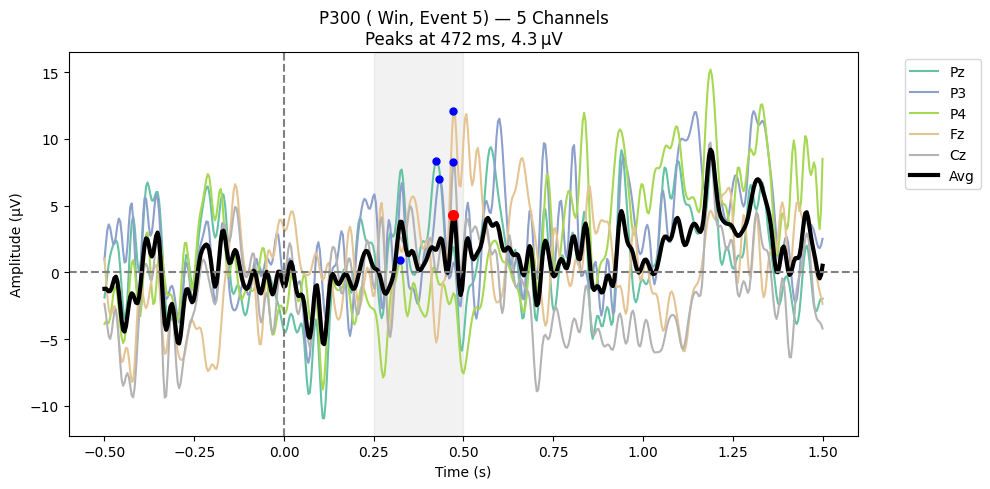

===  Win (Event 5) P300 positive peaks ===
   Pz:  424.0 ms,   8.3 µV
   P3:  432.0 ms,   7.0 µV
   P4:  324.0 ms,   0.9 µV
   Fz:  472.0 ms,  12.1 µV
   Cz:  472.0 ms,   8.3 µV
AVG:  472.0 ms,   4.3 µV



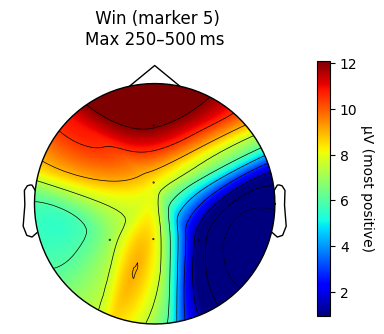

In [14]:
# --- 1. Define your event bins and channel sets ---
event_bins = {
    2: ' Trivia Response',
    4: 'Safe',
    5: ' Win',
    6: ' Loss',
    7: 'Reveal'
}
chs5 = ['Pz','P3','P4','Fz', 'Cz']

# --- 2. Pick your marker manually here ---
selected_event = 5  # ← change this to 4, 5, 6, or 7
name = event_bins[selected_event]

# --- 3. Positive peak time window (in seconds) ---
tmin, tmax = 0.25, 0.5

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs5)))

# --- 5. Select that event’s epochs and compute Evoked ---
epochs_sel = p300_epochs[selected_event].copy().pick(chs5)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # convert to µV

# --- 6. Find per‑channel positive peaks in your window ---
mask      = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs5):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmax(win_wv)              # positive peak index
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average positive peak ---
grand      = data.mean(axis=0)
grand_win  = grand[mask]
g_idx      = np.argmax(grand_win)
g_t        = win_times[g_idx]
g_a        = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'P300 ({name}, Event {selected_event}) — 5 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the positive peaks ---
print(f"=== {name} (Event {selected_event}) P300 positive peaks ===")
for ch in chs5:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

# --- 10. Topomap of positive peaks ---
# Crop evoked to the window
tmin_avg, tmax_avg = 0.25, 0.5
ev      = p300_epochs[selected_event].copy().pick(chs5).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data             # shape (n_channels, n_times)
data_peak = data_win.max(axis=1)   # positive peaks per channel

# convert to µV (already µV from data above)
data_peak_uv = data_peak *1e6

vmin_uv = data_peak_uv.min()
vmax_uv = data_peak_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_peak_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Max {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most positive)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


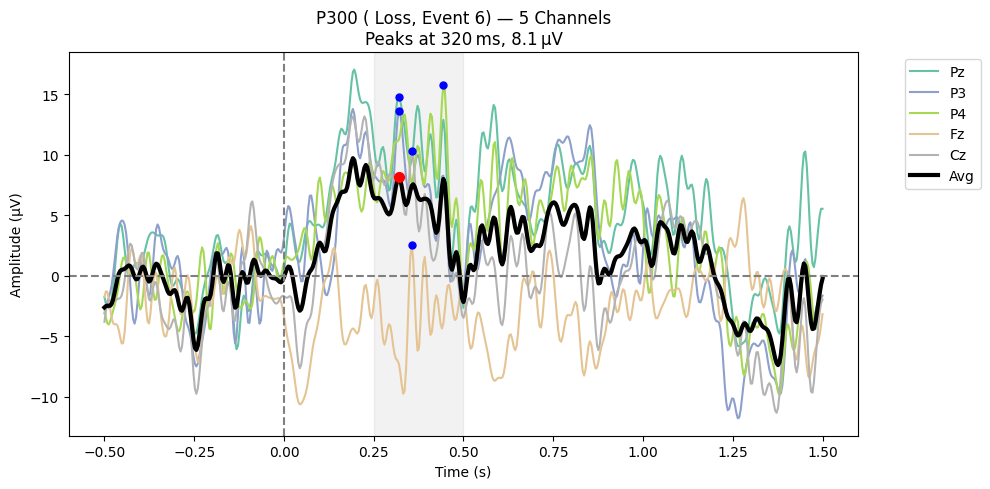

===  Loss (Event 6) P300 positive peaks ===
   Pz:  320.0 ms,  14.8 µV
   P3:  320.0 ms,  13.6 µV
   P4:  444.0 ms,  15.8 µV
   Fz:  356.0 ms,   2.6 µV
   Cz:  356.0 ms,  10.3 µV
AVG:  320.0 ms,   8.1 µV



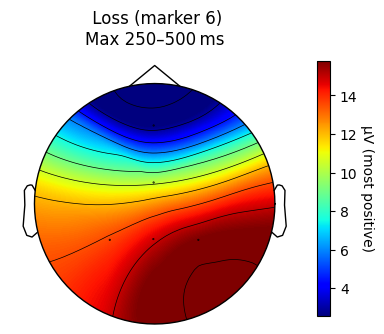

In [15]:
# --- 1. Define your event bins and channel sets ---
event_bins = {
    2: ' Trivia Response',
    4: 'Safe',
    5: ' Win',
    6: ' Loss',
    7: 'Reveal'
}
chs5 = ['Pz','P3','P4','Fz', 'Cz']

# --- 2. Pick your marker manually here ---
selected_event = 6  # ← change this to 4, 5, 6, or 7
name = event_bins[selected_event]

# --- 3. Positive peak time window (in seconds) ---
tmin, tmax = 0.25, 0.5

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs5)))

# --- 5. Select that event’s epochs and compute Evoked ---
epochs_sel = p300_epochs[selected_event].copy().pick(chs5)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # convert to µV

# --- 6. Find per‑channel positive peaks in your window ---
mask      = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs5):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmax(win_wv)              # positive peak index
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average positive peak ---
grand      = data.mean(axis=0)
grand_win  = grand[mask]
g_idx      = np.argmax(grand_win)
g_t        = win_times[g_idx]
g_a        = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'P300 ({name}, Event {selected_event}) — 5 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the positive peaks ---
print(f"=== {name} (Event {selected_event}) P300 positive peaks ===")
for ch in chs5:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

# --- 10. Topomap of positive peaks ---
# Crop evoked to the window
tmin_avg, tmax_avg = 0.25, 0.5
ev      = p300_epochs[selected_event].copy().pick(chs5).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data             # shape (n_channels, n_times)
data_peak = data_win.max(axis=1)   # positive peaks per channel

# convert to µV (already µV from data above)
data_peak_uv = data_peak *1e6

vmin_uv = data_peak_uv.min()
vmax_uv = data_peak_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_peak_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Max {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most positive)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


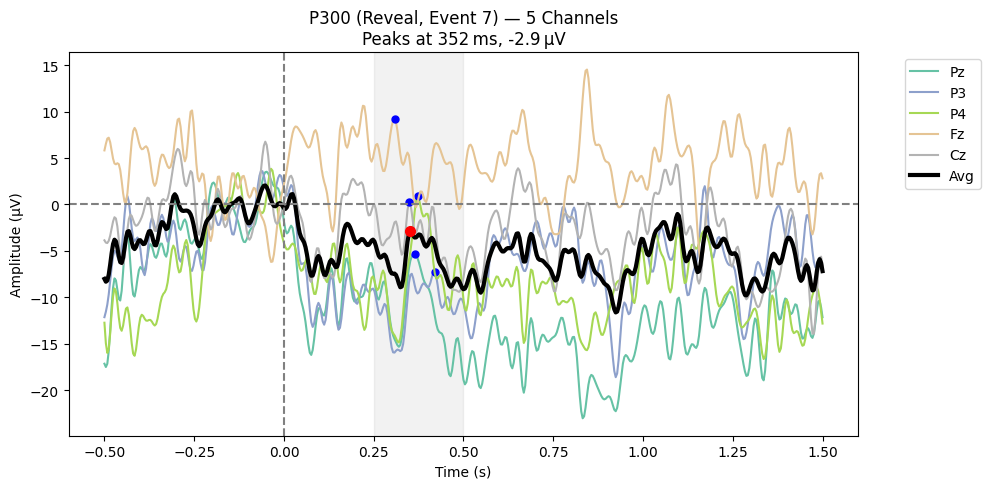

=== Reveal (Event 7) P300 positive peaks ===
   Pz:  364.0 ms,  -5.3 µV
   P3:  420.0 ms,  -7.2 µV
   P4:  372.0 ms,   0.9 µV
   Fz:  308.0 ms,   9.2 µV
   Cz:  348.0 ms,   0.3 µV
AVG:  352.0 ms,  -2.9 µV



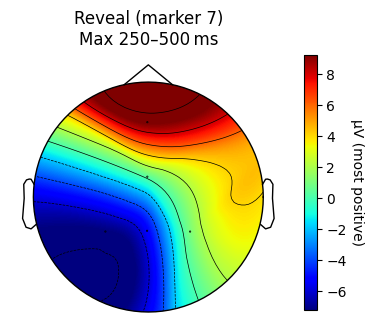

In [16]:
# --- 1. Define your event bins and channel sets ---
event_bins = {
    2: ' Trivia Response',
    4: 'Safe',
    5: ' Win',
    6: ' Loss',
    7: 'Reveal'
}
chs5 = ['Pz','P3','P4','Fz', 'Cz']

# --- 2. Pick your marker manually here ---
selected_event = 7  # ← change this to 4, 5, 6, or 7
name = event_bins[selected_event]

# --- 3. Positive peak time window (in seconds) ---
tmin, tmax = 0.25, 0.5

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs5)))

# --- 5. Select that event’s epochs and compute Evoked ---
epochs_sel = p300_epochs[selected_event].copy().pick(chs5)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # convert to µV

# --- 6. Find per‑channel positive peaks in your window ---
mask      = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs5):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmax(win_wv)              # positive peak index
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average positive peak ---
grand      = data.mean(axis=0)
grand_win  = grand[mask]
g_idx      = np.argmax(grand_win)
g_t        = win_times[g_idx]
g_a        = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'P300 ({name}, Event {selected_event}) — 5 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the positive peaks ---
print(f"=== {name} (Event {selected_event}) P300 positive peaks ===")
for ch in chs5:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

# --- 10. Topomap of positive peaks ---
# Crop evoked to the window
tmin_avg, tmax_avg = 0.25, 0.5
ev      = p300_epochs[selected_event].copy().pick(chs5).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data             # shape (n_channels, n_times)
data_peak = data_win.max(axis=1)   # positive peaks per channel

# convert to µV (already µV from data above)
data_peak_uv = data_peak *1e6

vmin_uv = data_peak_uv.min()
vmax_uv = data_peak_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_peak_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Max {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most positive)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


# n200

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import mne

# N200 epochs bin 1 7 electrodes
n200_epochs = mne.Epochs(
    raw_erp_clean,
    events,
    event_id=[4, 5, 6, 7],
    tmin=-0.2,
    tmax=0.8,
    baseline=(-0.2, 0),
    preload=True,
    picks=['Fz', 'FC1', 'FC2', 'Cz', 'CP1', 'CP2', 'Pz']
)
n200_epochs.drop_bad()
print("Surviving epochs:", len(n200_epochs))



Not setting metadata
50 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 50 events and 251 original time points ...
23 bad epochs dropped
Surviving epochs: 27


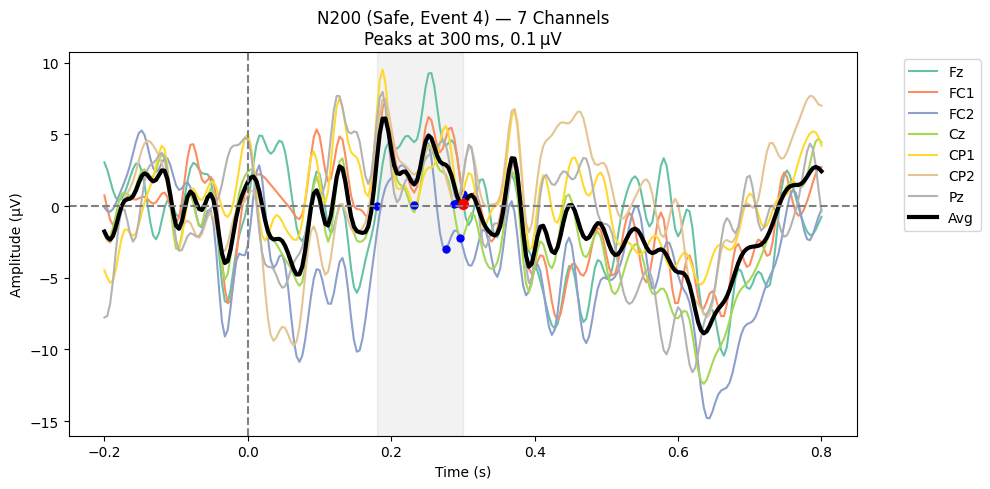

=== Safe (Event 4) N200 peaks ===
   Fz:  180.0 ms,   0.0 µV
  FC1:  300.0 ms,   0.8 µV
  FC2:  276.0 ms,  -3.0 µV
   Cz:  296.0 ms,  -2.2 µV
  CP1:  232.0 ms,   0.0 µV
  CP2:  288.0 ms,   0.1 µV
   Pz:  292.0 ms,   0.2 µV
AVG:  300.0 ms,   0.1 µV



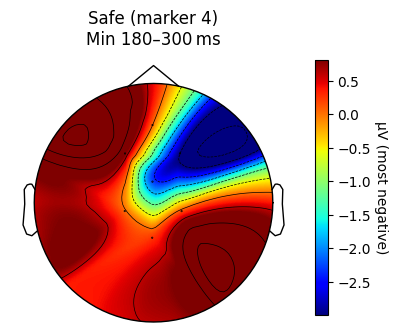

In [18]:


import matplotlib.pyplot as plt
import numpy as np
import mne

# --- 1. Define your event bins and channel sets ---
event_bins = {
    4: 'Safe',
    5: 'Win',
    6: 'Loss',
    7: 'Reveal'
}
chs7 = ['Fz', 'FC1', 'FC2', 'Cz', 'CP1', 'CP2', 'Pz']

# --- 2. Pick your marker manually here ---
selected_event = 4  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 7 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show();



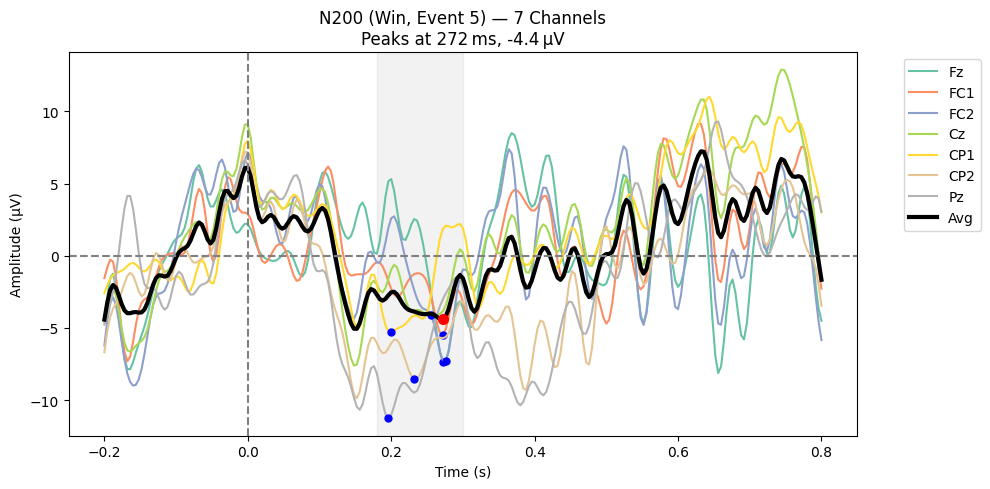

=== Win (Event 5) N200 peaks ===
   Fz:  272.0 ms,  -7.4 µV
  FC1:  272.0 ms,  -5.5 µV
  FC2:  276.0 ms,  -7.3 µV
   Cz:  256.0 ms,  -4.1 µV
  CP1:  200.0 ms,  -5.3 µV
  CP2:  232.0 ms,  -8.5 µV
   Pz:  196.0 ms, -11.3 µV
AVG:  272.0 ms,  -4.4 µV



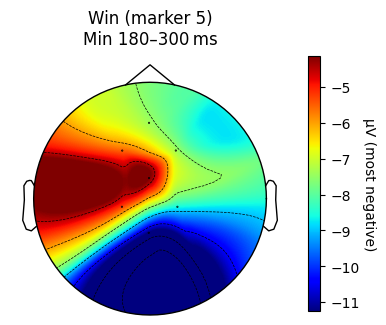

In [19]:
chs7 = ['Fz', 'FC1', 'FC2', 'Cz', 'CP1', 'CP2', 'Pz']

# --- 2. Pick your marker manually here ---
selected_event = 5  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 7 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



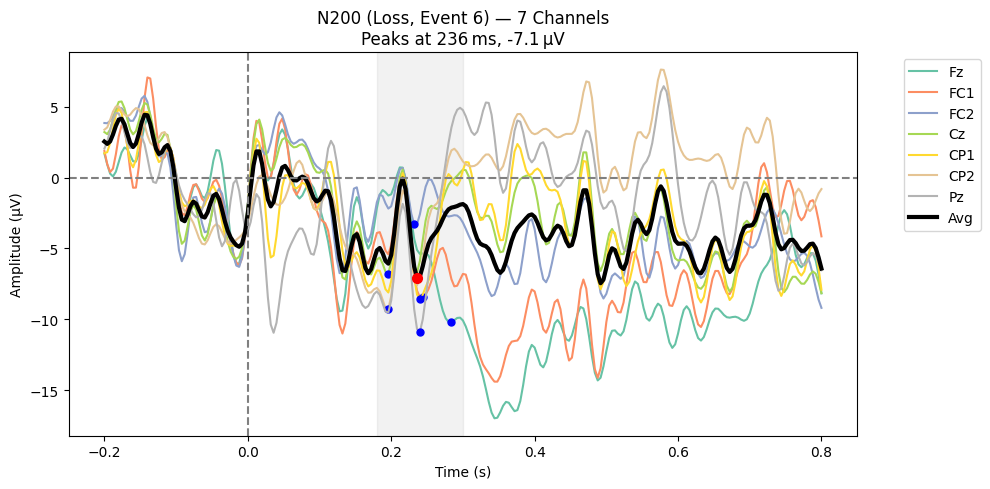

=== Loss (Event 6) N200 peaks ===
   Fz:  284.0 ms, -10.2 µV
  FC1:  244.0 ms,  -8.4 µV
  FC2:  232.0 ms,  -3.3 µV
   Cz:  196.0 ms,  -6.8 µV
  CP1:  240.0 ms,  -8.6 µV
  CP2:  196.0 ms,  -9.3 µV
   Pz:  240.0 ms, -10.9 µV
AVG:  236.0 ms,  -7.1 µV



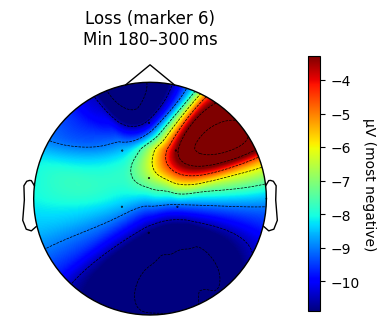

In [20]:
chs7 = ['Fz', 'FC1', 'FC2', 'Cz', 'CP1', 'CP2', 'Pz']

# --- 2. Pick your marker manually here ---
selected_event = 6  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 7 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



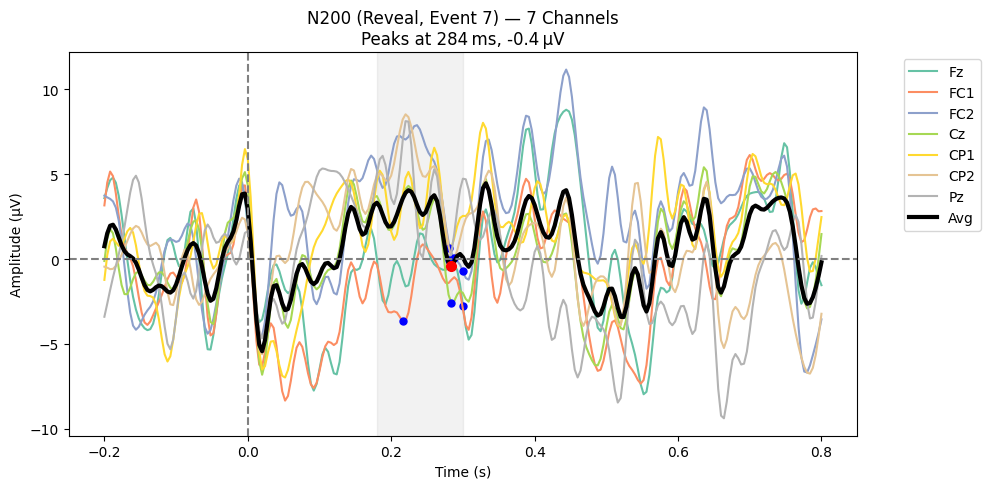

=== Reveal (Event 7) N200 peaks ===
   Fz:  300.0 ms,  -2.8 µV
  FC1:  216.0 ms,  -3.7 µV
  FC2:  300.0 ms,  -0.7 µV
   Cz:  284.0 ms,  -2.6 µV
  CP1:  280.0 ms,   0.7 µV
  CP2:  288.0 ms,   0.1 µV
   Pz:  280.0 ms,  -0.1 µV
AVG:  284.0 ms,  -0.4 µV



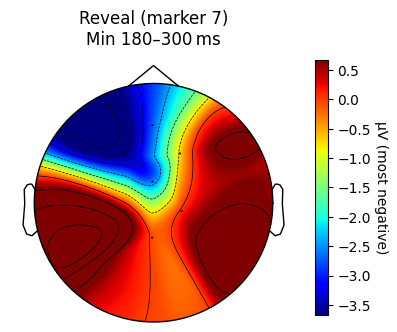

In [21]:
chs7 = ['Fz', 'FC1', 'FC2', 'Cz', 'CP1', 'CP2', 'Pz']

# --- 2. Pick your marker manually here ---
selected_event = 7  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 7 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



# for 3 elctrodes


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import mne

# N200 epochs bin 1 7 electrodes
n200_epochs = mne.Epochs(
    raw_erp_clean,
    events,
    event_id=[4, 5, 6, 7],
    tmin=-0.2,
    tmax=0.8,
    baseline=(-0.2, 0),
    preload=True,
    picks=['Fz', 'FC1', 'FC2']
)
n200_epochs.drop_bad()
print("Surviving epochs:", len(n200_epochs))



Not setting metadata
50 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 50 events and 251 original time points ...
23 bad epochs dropped
Surviving epochs: 27


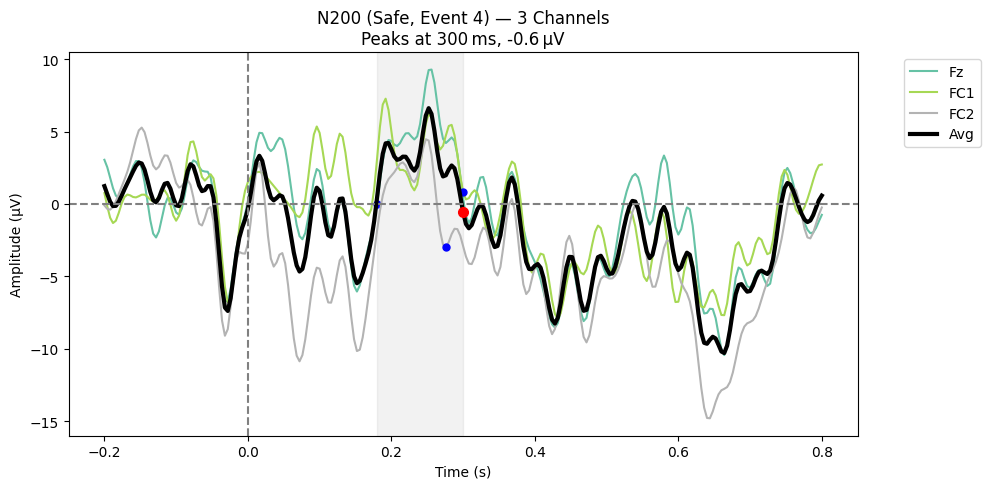

=== Safe (Event 4) N200 peaks ===
   Fz:  180.0 ms,   0.0 µV
  FC1:  300.0 ms,   0.8 µV
  FC2:  276.0 ms,  -3.0 µV
AVG:  300.0 ms,  -0.6 µV



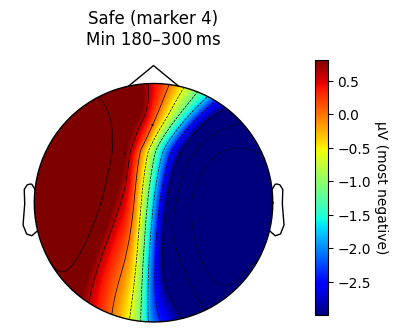

In [23]:
chs7 = ['Fz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 4  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 3 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



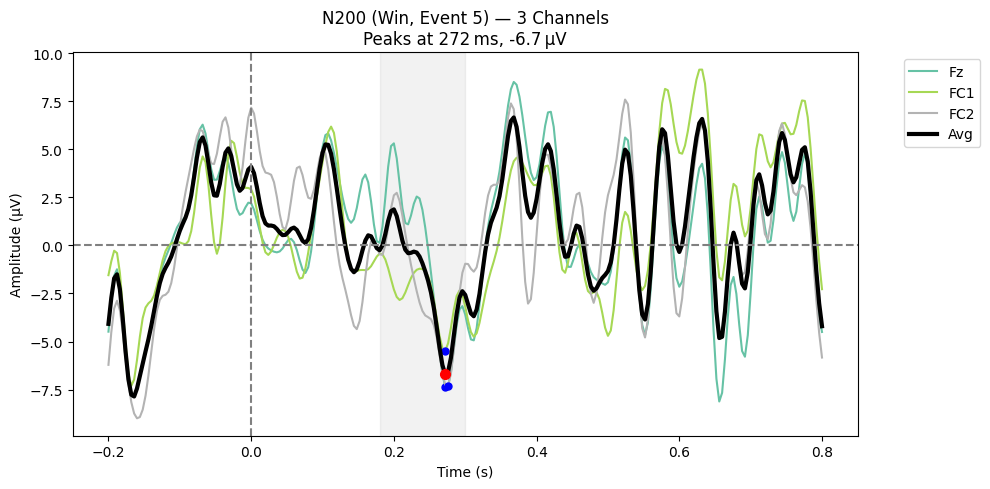

=== Win (Event 5) N200 peaks ===
   Fz:  272.0 ms,  -7.4 µV
  FC1:  272.0 ms,  -5.5 µV
  FC2:  276.0 ms,  -7.3 µV
AVG:  272.0 ms,  -6.7 µV



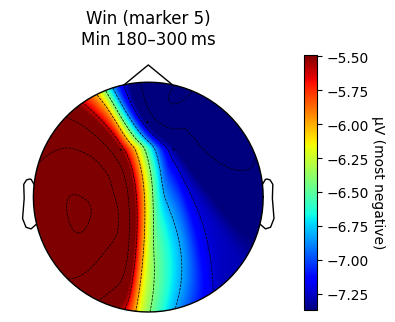

In [24]:
chs7 = ['Fz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 5  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 3 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



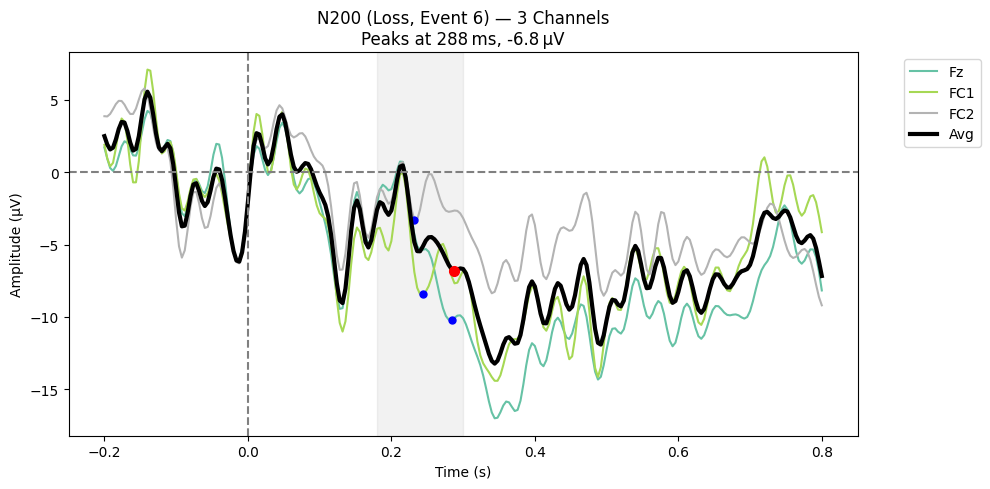

=== Loss (Event 6) N200 peaks ===
   Fz:  284.0 ms, -10.2 µV
  FC1:  244.0 ms,  -8.4 µV
  FC2:  232.0 ms,  -3.3 µV
AVG:  288.0 ms,  -6.8 µV



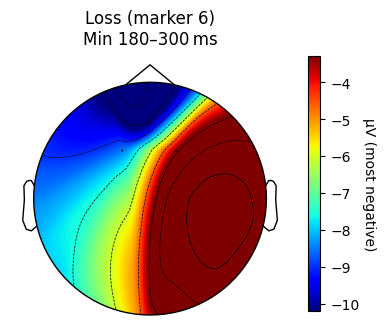

In [25]:
chs7 = ['Fz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 6  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 3 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



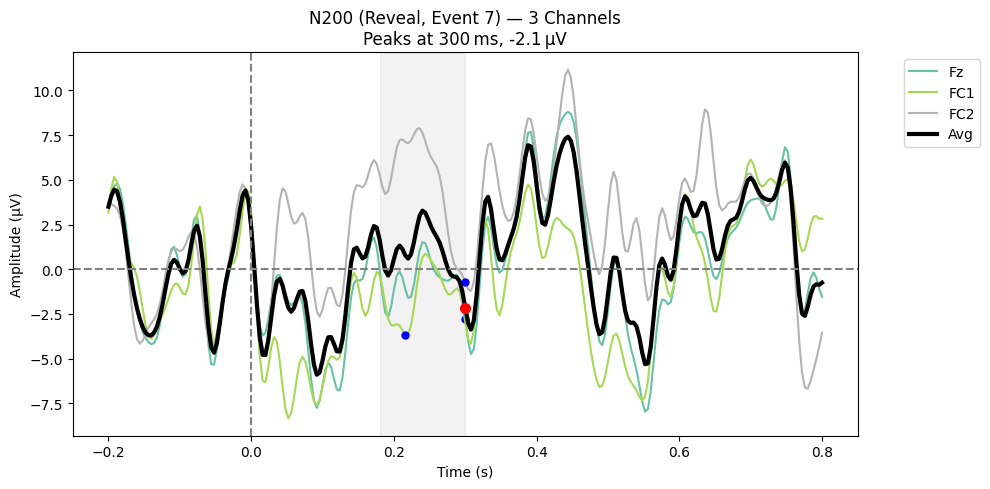

=== Reveal (Event 7) N200 peaks ===
   Fz:  300.0 ms,  -2.8 µV
  FC1:  216.0 ms,  -3.7 µV
  FC2:  300.0 ms,  -0.7 µV
AVG:  300.0 ms,  -2.1 µV



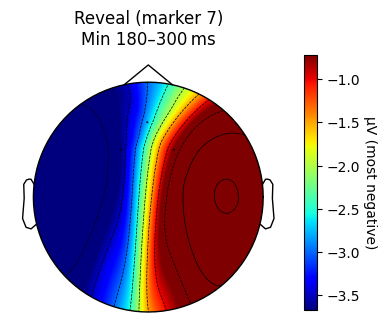

In [26]:
chs7 = ['Fz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 7  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 3 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



# FRN

In [27]:
# FRN epochs 
frn_epochs = mne.Epochs(
    raw_erp_clean,
    events,
    event_id=[5, 6],
    tmin=-0.2,
    tmax=0.6,
    baseline=(-0.2, 0),
    preload=True,
    picks=['Fz', 'Cz', 'FC1', 'FC2']
   
)
frn_epochs.drop_bad()
print("Surviving epochs:", len(frn_epochs))


Not setting metadata
26 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 26 events and 201 original time points ...
12 bad epochs dropped
Surviving epochs: 14


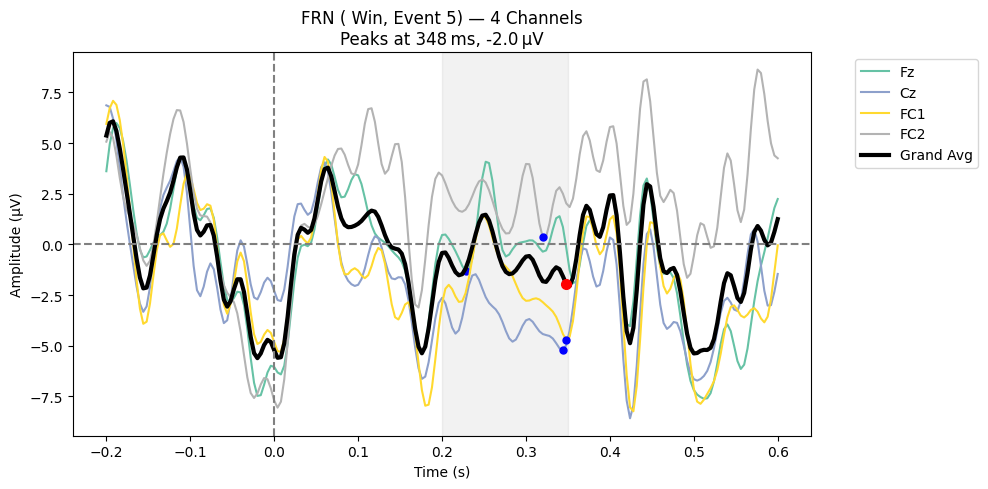

===  Win (Event 5) FRN peaks ===
   Fz:  228.0 ms,  -1.3 µV
   Cz:  344.0 ms,  -5.2 µV
  FC1:  348.0 ms,  -4.7 µV
  FC2:  320.0 ms,   0.4 µV
Grand:  348.0 ms,  -2.0 µV



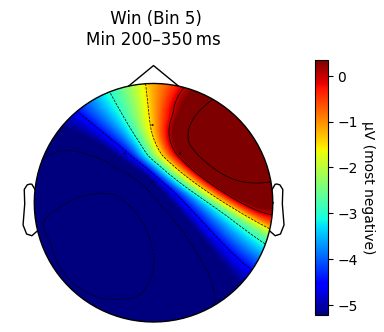

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import mne

# --- 1. Define your event bins and channel sets ---
event_bins = {
    
    5: ' Win',
    6: 'Loss'
}
chs4 = ['Fz', 'Cz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 5  # ← change this to 4, 5, or 6
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.2, 0.35

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs4)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = frn_epochs[selected_event].copy().pick(chs4)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs4):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Grand Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'FRN ({name}, Event {selected_event}) — 4 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) FRN peaks ===")
for ch in chs4:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"Grand: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

tmin_avg, tmax_avg = 0.2, 0.35

ev  = frn_epochs[selected_event].copy().pick(chs4).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (Bin {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


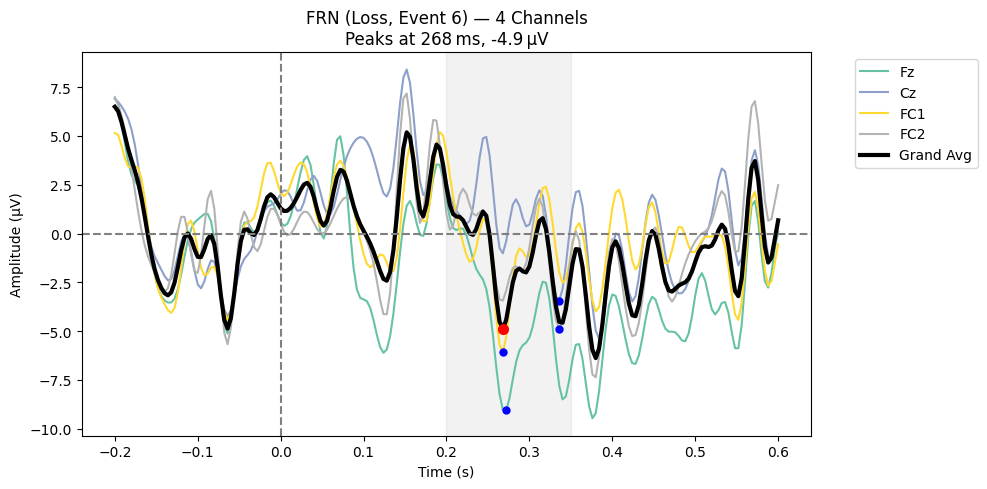

=== Loss (Event 6) FRN peaks ===
   Fz:  272.0 ms,  -9.1 µV
   Cz:  336.0 ms,  -3.5 µV
  FC1:  268.0 ms,  -6.1 µV
  FC2:  336.0 ms,  -4.9 µV
Grand:  268.0 ms,  -4.9 µV



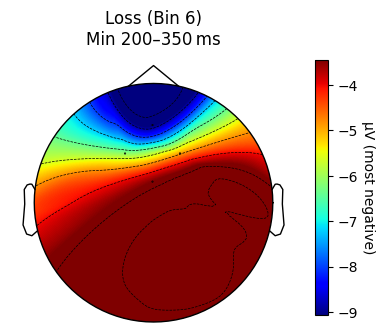

In [29]:
chs4 = ['Fz', 'Cz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 6  # ← change this to 4, 5, or 6
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.2, 0.35

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs4)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = frn_epochs[selected_event].copy().pick(chs4)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs4):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Grand Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'FRN ({name}, Event {selected_event}) — 4 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) FRN peaks ===")
for ch in chs4:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"Grand: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

tmin_avg, tmax_avg = 0.2, 0.35

ev  = frn_epochs[selected_event].copy().pick(chs4).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (Bin {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


## frn 2 electrodes

In [30]:
# FRN epochs 
frn_epochs = mne.Epochs(
    raw_erp_clean,
    events,
    event_id=[5, 6],
    tmin=-0.2,
    tmax=0.6,
    baseline=(-0.2, 0),
    preload=True,
    picks=['Fz', 'Cz']
   
)
frn_epochs.drop_bad()
print("Surviving epochs:", len(frn_epochs))


Not setting metadata
26 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 26 events and 201 original time points ...
12 bad epochs dropped
Surviving epochs: 14


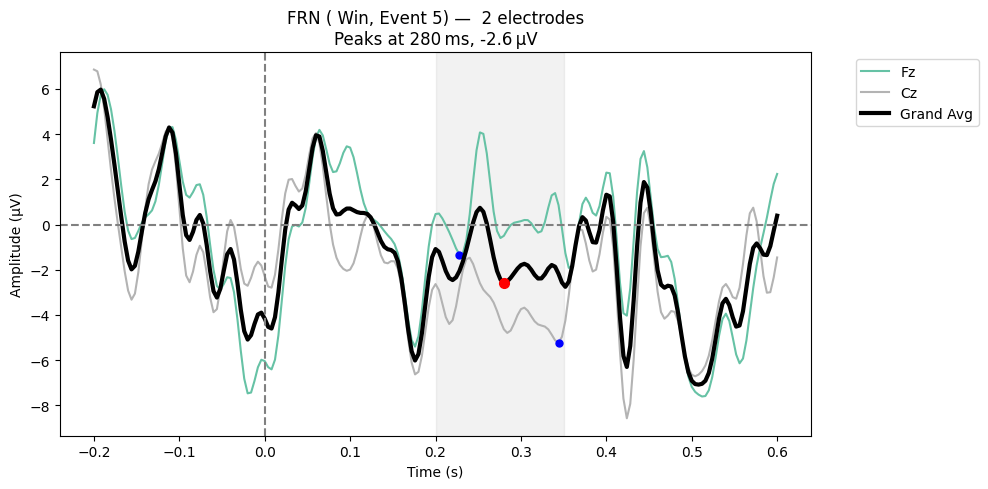

===  Win (Event 5) FRN peaks ===
   Fz:  228.0 ms,  -1.3 µV
   Cz:  344.0 ms,  -5.2 µV
Grand:  280.0 ms,  -2.6 µV



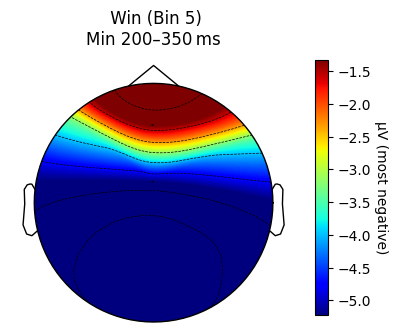

In [31]:
chs2 = ['Fz', 'Cz']

# --- 2. Pick your marker manually here ---
selected_event = 5  # ← change this to 4, 5, or 6
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.2, 0.35

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs2)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = frn_epochs[selected_event].copy().pick(chs2)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs2):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Grand Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'FRN ({name}, Event {selected_event}) —  2 electrodes\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) FRN peaks ===")
for ch in chs2:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"Grand: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

tmin_avg, tmax_avg = 0.2, 0.35

ev  = frn_epochs[selected_event].copy().pick(chs2).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (Bin {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


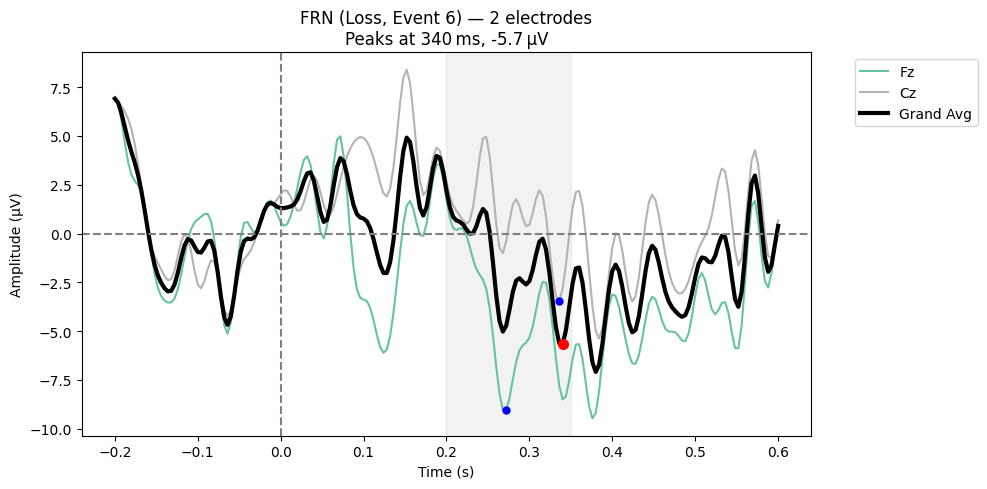

=== Loss (Event 6) FRN peaks ===
   Fz:  272.0 ms,  -9.1 µV
   Cz:  336.0 ms,  -3.5 µV
Grand:  340.0 ms,  -5.7 µV



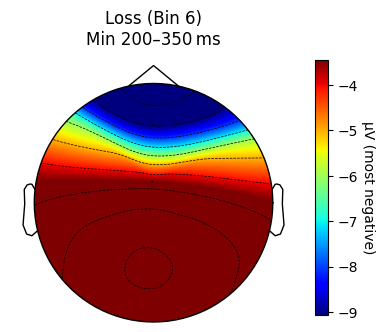

In [32]:
chs2 = ['Fz', 'Cz']

# --- 2. Pick your marker manually here ---
selected_event = 6  # ← change this to 4, 5, or 6
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.2, 0.35

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs2)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = frn_epochs[selected_event].copy().pick(chs2)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs2):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Grand Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'FRN ({name}, Event {selected_event}) — 2 electrodes\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) FRN peaks ===")
for ch in chs2:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"Grand: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

tmin_avg, tmax_avg = 0.2, 0.35

ev  = frn_epochs[selected_event].copy().pick(chs2).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='jet',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (Bin {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()
